In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
# 2) Load dataset
df = pd.read_csv("Historical_Tropical_Storm_Tracks.csv")   # replace with your actual CSV name
df.head()


,index,FID,YEAR,MONTH,DAY,AD_TIME,BTID,NAME,LAT,LONG,WIND_KTS,PRESSURE,CAT,BASIN,Shape_Leng
0,0,2001,1957,8,8,1800Z,63,NOTNAMED,22.5,-140.0,50,0,TS,Eastern Pacific,1.140175
1,1,2002,1961,10,3,1200Z,116,PAULINE,22.1,-140.2,45,0,TS,Eastern Pacific,1.166190
2,2,2003,1962,8,29,0600Z,124,C,18.0,-140.0,45,0,TS,Eastern Pacific,2.102380
3,3,2004,1967,7,14,0600Z,168,DENISE,16.6,-139.5,45,0,TS,Eastern Pacific,2.121320
4,4,2005,1972,8,16,1200Z,251,DIANA,18.5,-139.8,70,0,H1,Eastern Pacific,1.702939


In [4]:
# 3a) Dataset info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59228 entries, 0 to 59227
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       59228 non-null  int64  
 1   FID         59228 non-null  int64  
 2   YEAR        59228 non-null  int64  
 3   MONTH       59228 non-null  int64  
 4   DAY         59228 non-null  int64  
 5   AD_TIME     59228 non-null  object 
 6   BTID        59228 non-null  int64  
 7   NAME        59228 non-null  object 
 8   LAT         59228 non-null  float64
 9   LONG        59228 non-null  float64
 10  WIND_KTS    59228 non-null  int64  
 11  PRESSURE    59228 non-null  int64  
 12  CAT         59228 non-null  object 
 13  BASIN       59228 non-null  object 
 14  Shape_Leng  59228 non-null  float64
dtypes: float64(3), int64(8), object(4)
memory usage: 6.8+ MB


In [5]:
# 3b) Summary statistics
df.describe()


,index,FID,YEAR,MONTH,DAY,BTID,LAT,LONG,WIND_KTS,PRESSURE,Shape_Leng
count,59228.000000,59228.000000,59228.000000,59228.000000,59228.000000,59228.000000,59228.000000,59228.000000,59228.000000,59228.000000,59228.000000
mean,29613.500000,29614.500000,1957.194874,8.540521,15.867326,648.398899,23.526400,-83.196863,54.726802,372.336800,1.201987
std,17097.795209,17097.795209,41.665792,1.364174,8.793432,372.376803,9.464955,37.282152,25.133577,480.562974,0.834497
min,0.000000,1.000000,1851.000000,1.000000,1.000000,1.000000,4.200000,-180.000000,10.000000,0.000000,0.000000
25%,14806.750000,14807.750000,1928.000000,8.000000,8.000000,344.000000,16.100000,-108.500000,35.000000,0.000000,0.707107
50%,29613.500000,29614.500000,1970.000000,9.000000,16.000000,606.000000,21.200000,-81.200000,50.000000,0.000000,1.029563
75%,44420.250000,44421.250000,1991.000000,9.000000,23.000000,920.000000,29.600000,-62.200000,70.000000,990.000000,1.431782
max,59227.000000,59228.000000,2008.000000,12.000000,31.000000,1410.000000,69.000000,180.000000,165.000000,1024.000000,11.180340


In [6]:
# 3c) Missing values
df.isnull().sum()


index         0
FID           0
YEAR          0
MONTH         0
DAY           0
AD_TIME       0
BTID          0
NAME          0
LAT           0
LONG          0
WIND_KTS      0
PRESSURE      0
CAT           0
BASIN         0
Shape_Leng    0
dtype: int64

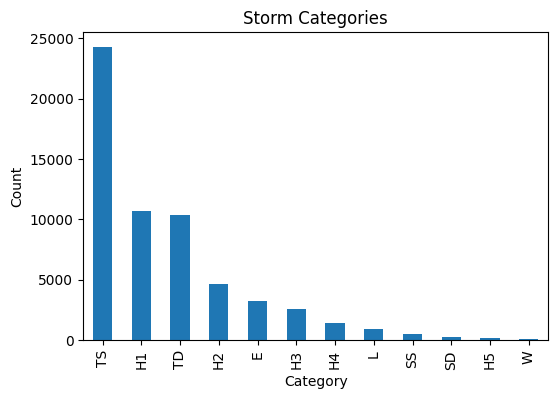

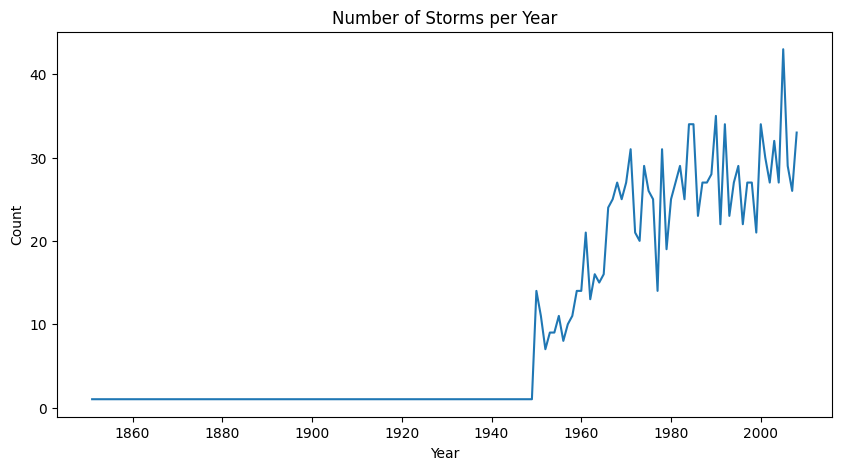

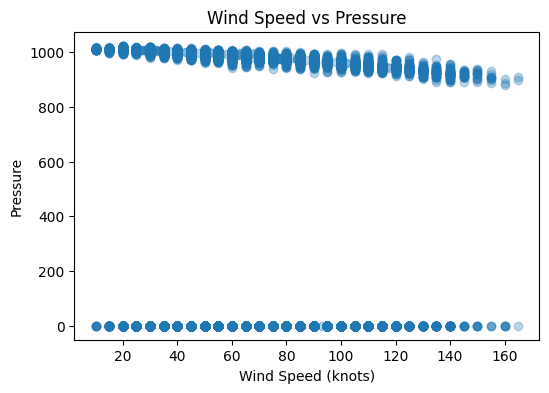

In [7]:
# Distribution of storm categories
df['CAT'].value_counts().plot(kind='bar', figsize=(6,4), title="Storm Categories")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

# Number of storms per year
storms_per_year = df.groupby("YEAR")['NAME'].nunique()
storms_per_year.plot(figsize=(10,5), title="Number of Storms per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

# Relationship between wind speed and pressure
plt.figure(figsize=(6,4))
plt.scatter(df["WIND_KTS"], df["PRESSURE"], alpha=0.3)
plt.title("Wind Speed vs Pressure")
plt.xlabel("Wind Speed (knots)")
plt.ylabel("Pressure")
plt.show()


In [8]:
# Convert storm category (CAT) into numerical codes
df['CAT_Code'] = df['CAT'].astype('category').cat.codes

# Example: Create a new column for decade
df['Decade'] = (df['YEAR'] // 10) * 10

# Check transformed columns
df[['YEAR', 'CAT', 'CAT_Code', 'Decade']].head()


,YEAR,CAT,CAT_Code,Decade
0,1957,TS,10,1950
1,1961,TS,10,1960
2,1962,TS,10,1960
3,1967,TS,10,1960
4,1972,H1,1,1970


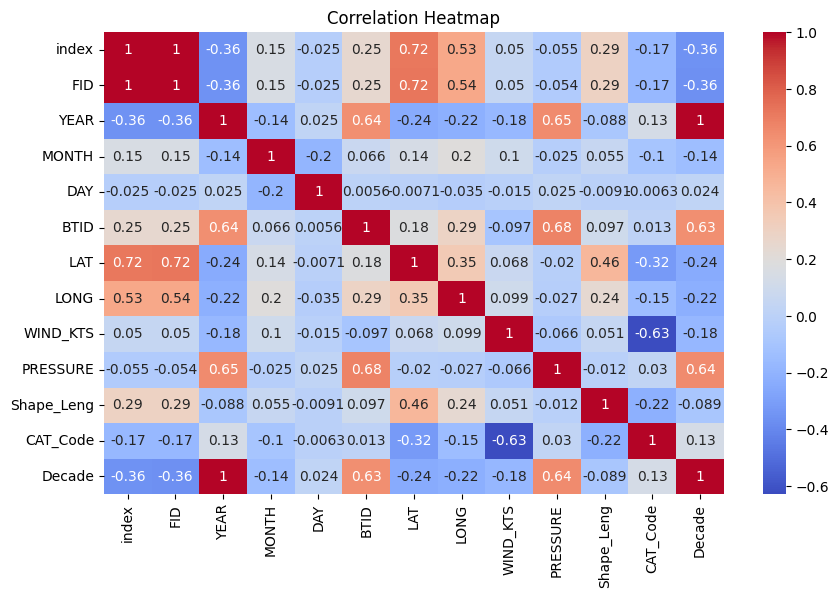

WIND_KTS      1.000000
MONTH         0.102651
LONG          0.098579
LAT           0.068321
Shape_Leng    0.051325
index         0.050318
FID           0.050195
DAY          -0.014919
PRESSURE     -0.065721
BTID         -0.097430
YEAR         -0.176625
Decade       -0.177005
CAT_Code     -0.628403
Name: WIND_KTS, dtype: float64


In [10]:
# Correlation matrix
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Quick feature importance idea: check correlation with wind speed
print(df.corr(numeric_only=True)['WIND_KTS'].sort_values(ascending=False))
